In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get data

In [113]:
#get data
data_bench = pd.read_pickle("data/course_and_uni_1819.pkl")
data_covid = pd.read_pickle("data/course_and_uni_2122.pkl")

#drop not needed columns - no point in keeping uni and course as we don't have future data (duh)
data_bench.drop(["uni","course"],inplace = True, axis = "columns")
data_covid.drop(["uni","course"], inplace = True, axis = "columns")

data_bench

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0.807250,0.68250,0.51025,0.50355,0.651650,0.658200,0.654250,0.52195,0.600400,0.444250,...,0.612150,0.53395,0.643250,0.59545,0.75470,0.65185,0.617850,0.429400,0.368450,0.50085
1,0.944450,0.90835,1.00000,0.83890,0.811100,0.858350,0.972200,0.66945,0.500000,0.366650,...,0.888900,0.98610,0.986100,0.91665,0.97220,0.82500,0.671450,0.444450,0.830550,0.87500
2,0.928550,0.92955,0.95275,0.96110,0.911000,0.939750,0.942550,0.65515,0.658750,0.782150,...,0.527250,0.65605,0.859050,0.94995,0.96110,0.92215,0.880350,0.880350,0.815900,0.92120
3,0.980925,0.88655,0.87435,0.82560,0.858525,0.915825,0.826375,0.84610,0.755275,0.670325,...,0.939425,0.90250,0.909075,0.74730,0.85045,0.86130,0.748725,0.685475,0.556975,0.92330
4,0.956200,0.91390,0.92010,0.85765,0.931550,0.912400,0.899300,0.82725,0.815500,0.821600,...,0.937450,0.91200,0.924250,0.74590,0.95465,0.93755,0.873950,0.790100,0.580100,0.91370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0.947150,0.89300,0.90020,0.78180,0.876150,0.885600,0.711200,0.78450,0.827650,0.718750,...,0.770800,0.76715,0.791650,0.50600,0.56215,0.89870,0.767650,0.600800,0.345350,0.90125
1494,1.000000,1.00000,1.00000,1.00000,0.988100,1.000000,0.913950,0.94050,1.000000,0.878200,...,0.913950,1.00000,0.975000,0.82310,0.75910,0.97620,0.964300,0.842500,0.543200,0.96430
1495,0.896850,0.91665,0.89685,0.89285,0.924600,0.892850,0.816650,0.86905,0.817450,0.789650,...,0.920650,0.84920,0.849200,0.61505,0.60555,0.97220,0.797600,0.619050,0.555600,0.89285
1496,0.855250,0.85455,0.90405,0.83660,0.906550,0.874050,0.746350,0.82460,0.795150,0.756650,...,0.784750,0.77125,0.744000,0.52205,0.58090,0.85455,0.741700,0.481300,0.398550,0.85170


# Benchmark 

#### Pearson correlation

<AxesSubplot: >

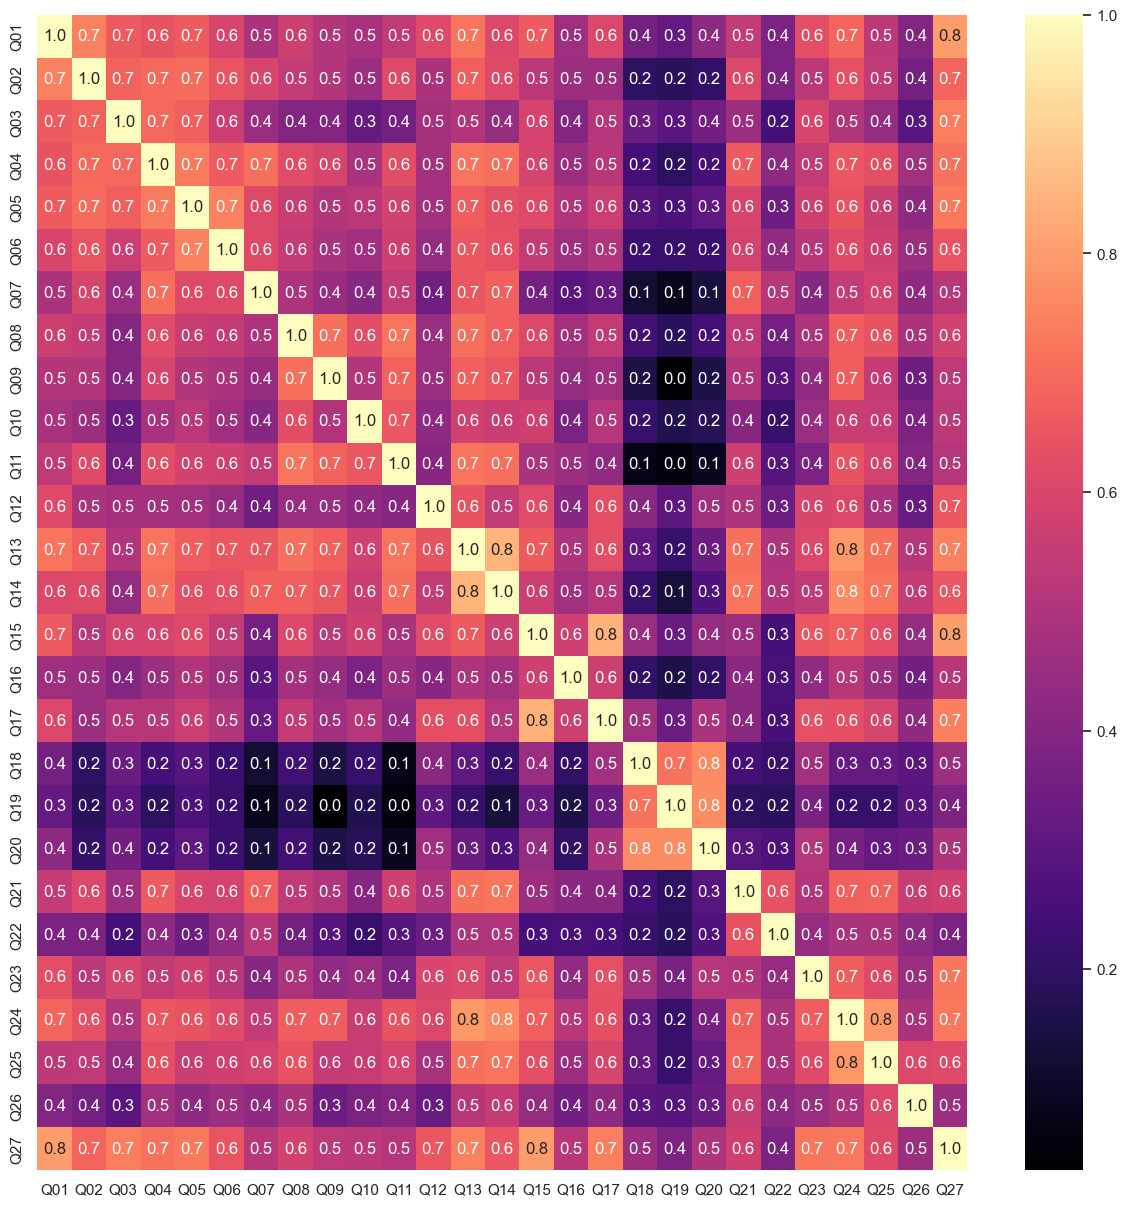

In [114]:
pearson_corr_bench = data_bench.corr(method="pearson")

sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(pearson_corr_bench, cmap = "magma", annot=True, fmt = ".1f")

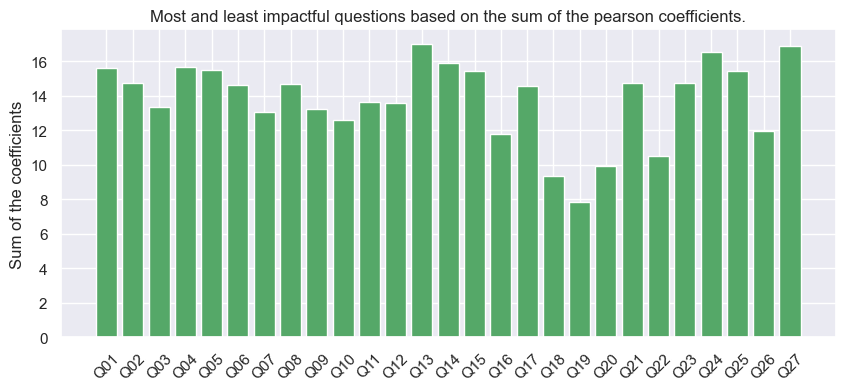

In [115]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,28), pearson_corr_bench.sum(), color= "g")
plt.xticks(np.arange(1,28), pearson_corr_bench.columns, rotation = 45)
plt.title("Most and least impactful questions based on the sum of the pearson coefficients.")
plt.ylabel("Sum of the coefficients")
plt.show()

In [116]:
pearson_corr27_bench = pearson_corr_bench["Q27"]
pearson_corr27_bench

Q01    0.801950
Q02    0.684510
Q03    0.736297
Q04    0.713637
Q05    0.730824
Q06    0.645332
Q07    0.522845
Q08    0.580589
Q09    0.532412
Q10    0.528690
Q11    0.513190
Q12    0.653148
Q13    0.746362
Q14    0.649037
Q15    0.802607
Q16    0.520845
Q17    0.742736
Q18    0.457900
Q19    0.381206
Q20    0.497768
Q21    0.575660
Q22    0.377186
Q23    0.723237
Q24    0.725915
Q25    0.614466
Q26    0.455686
Q27    1.000000
Name: Q27, dtype: float64

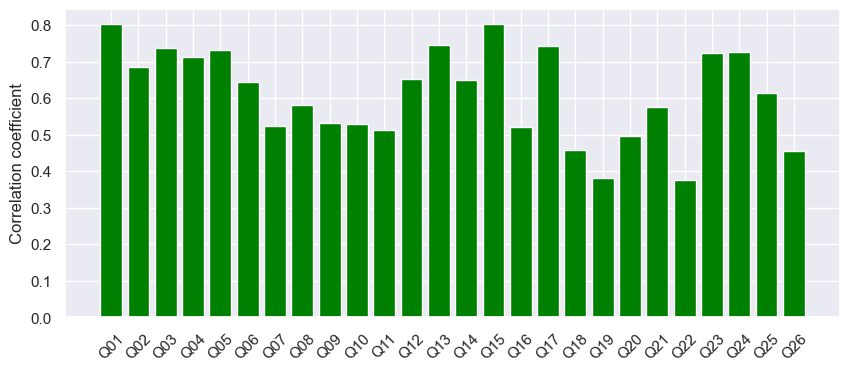

In [117]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,27), pearson_corr27_bench[:-1], color = "green")
plt.xticks(np.arange(1,27), pearson_corr27_bench.index[:-1], rotation = 45)
plt.ylabel("Correlation coefficient")
plt.show()

# Covid 

<AxesSubplot: >

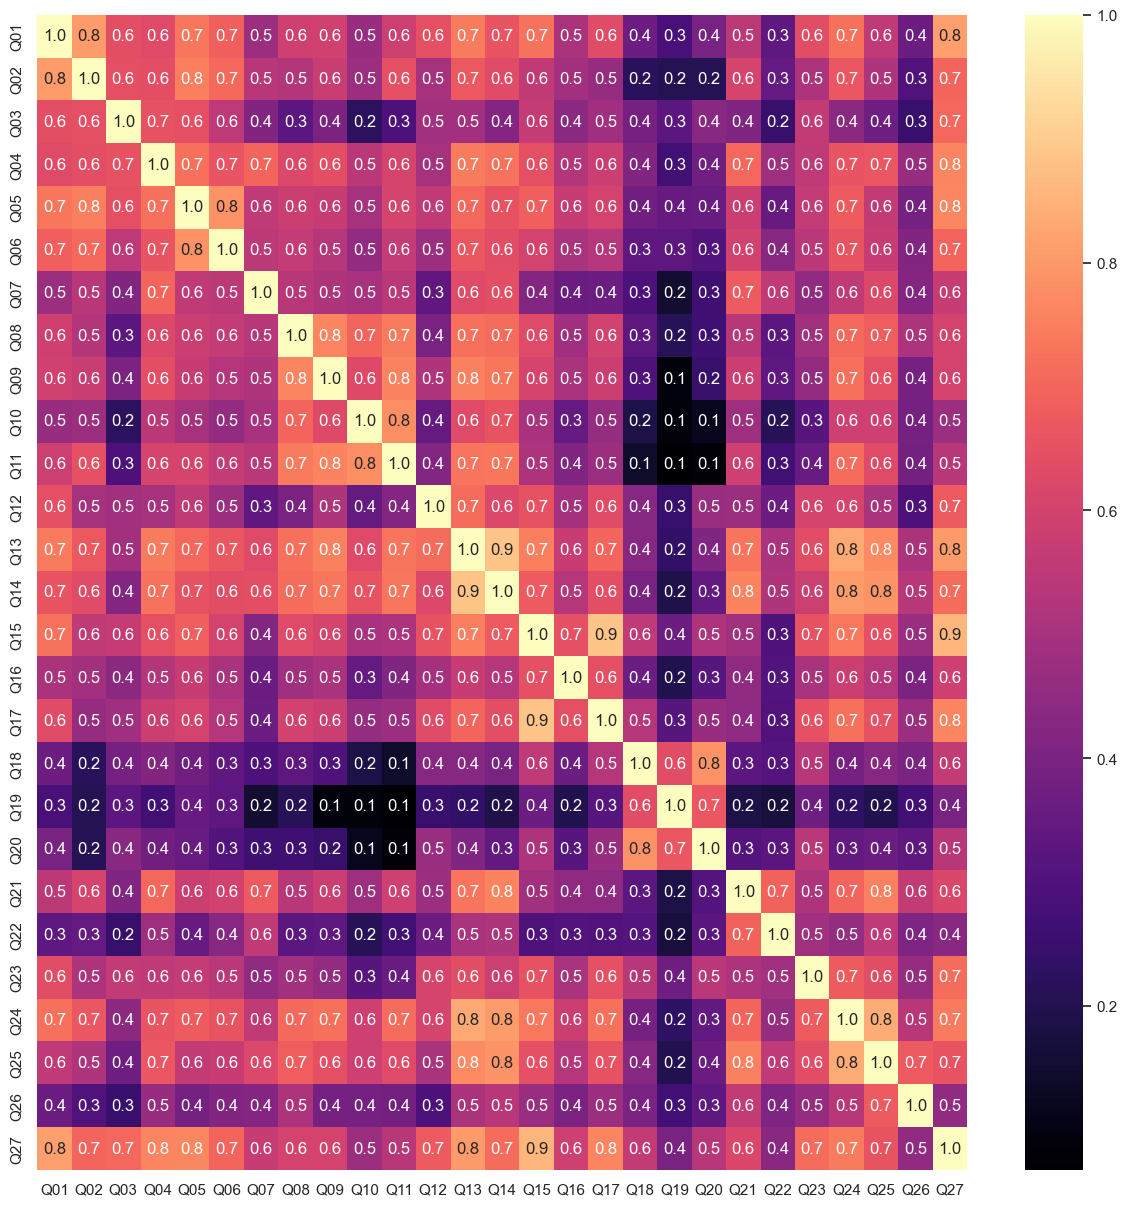

In [126]:
pearson_corr_covid = data_covid.corr(method="pearson")

sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(pearson_corr_covid, cmap = "magma", annot=True, fmt=".1f")

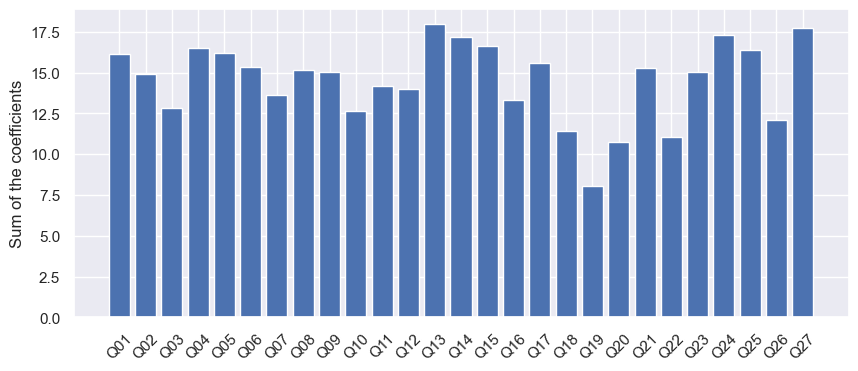

In [124]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,28), pearson_corr_covid.sum(), color= "b")
plt.xticks(np.arange(1,28), pearson_corr_covid.columns, rotation = 45)
#plt.title("Most and least impactful questions based on the sum of the pearson coefficients.")
plt.ylabel("Sum of the coefficients")
plt.show()

In [133]:
pearson_corr27_covid = pearson_corr_covid["Q27"]
pearson_corr27_covid

Q01    0.811826
Q02    0.695573
Q03    0.704149
Q04    0.760150
Q05    0.765211
Q06    0.698082
Q07    0.571848
Q08    0.600298
Q09    0.603003
Q10    0.472123
Q11    0.536573
Q12    0.675297
Q13    0.800795
Q14    0.712116
Q15    0.855508
Q16    0.588350
Q17    0.761104
Q18    0.561288
Q19    0.394649
Q20    0.539254
Q21    0.620015
Q22    0.433206
Q23    0.712853
Q24    0.744482
Q25    0.654748
Q26    0.452117
Q27    1.000000
Name: Q27, dtype: float64

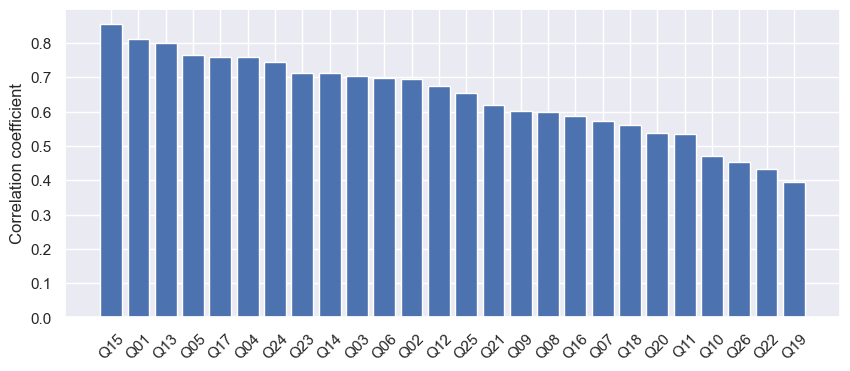

In [131]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,27), pearson_corr27_covid[1:], color = "b")
plt.xticks(np.arange(1,27), pearson_corr27_covid.index[1:], rotation = 45)
plt.ylabel("Correlation coefficient")
plt.show()

# Comparison

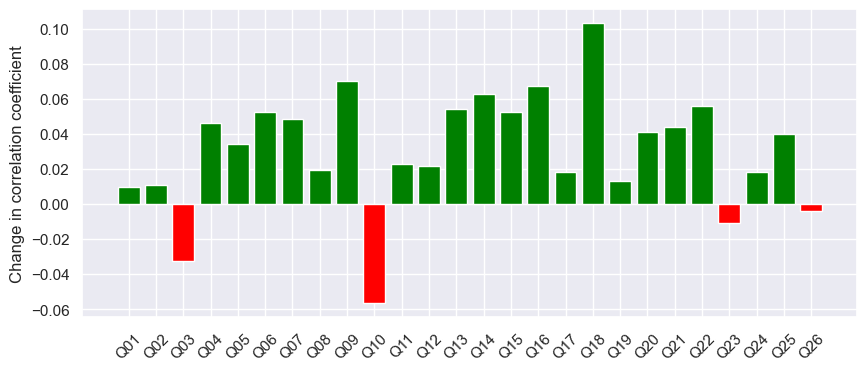

In [141]:
y = pearson_corr27_covid[:-1] - pearson_corr27_bench[:-1]
x = np.arange(26)
mask1 = y < 0
mask2 = y >= 0

plt.figure(figsize=(10, 4))
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'green')
plt.xticks(x, pearson_corr27_covid.index[:-1], rotation = 45)
plt.ylabel("Change in correlation coefficient")
plt.show()